In [30]:
import itertools
import random
import tqdm
from linear_algebra import squared_distance
from linear_algebra import vector_mean
from linear_algebra import Vector
from typing import List
from linear_algebra import Vector

def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

assert num_differences([1, 2, 3], [2, 1, 3]) == 2
assert num_differences([1, 2], [1, 2]) == 0

def cluster_means(k: int,
                 inputs: List[Vector],
                 assignments: List[int]) -> List[Vector]:
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)

    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
           for cluster in clusters]
class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k # number of clusters
        self.means = None
        
    def classify(self, input: Vector) -> int:
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
        key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs: List[Vector]) -> None:
        # Start with random assignments
        assignments = [random.randrange(self.k) for _ in inputs]
    
        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]
        
                # Check how many assignments changed and if we're done
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return
        
                # Otherwise keep the new assignments, and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

In [31]:
path = "./2.jpg"
import matplotlib.image as mpimg
import random
img = mpimg.imread(path)/256

In [32]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

In [33]:
pixels=[pixel for row in img for pixel in row]

In [42]:
clusterer = KMeans(2)
clusterer.train(pixels)

changed: 2 / 135000: : 15it [00:32,  2.15s/it]   


In [43]:
def recolor(pixel):
    cluster = clusterer.classify(pixel)
    return clusterer.means[cluster]


In [44]:
new_img = [[recolor(pixel) for pixel in row]
          for row in img]


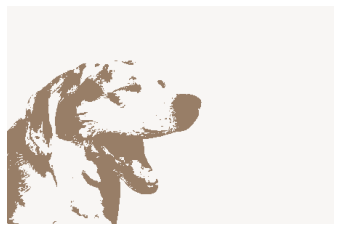

In [45]:
import matplotlib.pyplot as plt
plt.imshow(new_img)
plt.axis('off')
plt.show()